In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)

css_styling()

In [2]:
import os

In [3]:
datapath = os.environ.get("DATASETS")

In [4]:
datapath

'C:\\Users\\Harry\\Documents\\DS\\Datasets'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Input, Flatten, GlobalMaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Load data

In [13]:
directory = f"{datapath}/vegetables/Vegetable-Images/train"
train_set, val_set = image_dataset_from_directory(
    directory=directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    validation_split=0.2,
    subset='both',
    seed=42,
)

Found 15000 files belonging to 15 classes.
Using 12000 files for training.
Using 3000 files for validation.


In [14]:
def rescale(img, label):
    return img/255.0, label

train_set_scaled = train_set.map(rescale)
val_set_scaled = val_set.map(rescale)

In [15]:
def images(img, label):
    return img

def labels(img, label):
    return label

X_val = val_set_scaled.map(images).as_numpy_iterator()
y_val = val_set_scaled.map(labels).as_numpy_iterator()

### Visualize data

In [16]:
next(X_val).shape

(32, 224, 224, 3)

In [17]:
next(y_val).shape

(32, 15)

In [149]:
for x, y in val_set_scaled:
    x.numpy()
    y.numpy()

In [18]:
classes = os.listdir(path=f"{datapath}/vegetables/Vegetable-Images/train")

<Figure size 1440x1440 with 0 Axes>

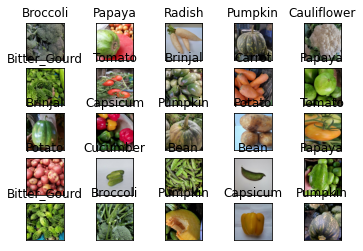

In [20]:
plt.figure(figsize=(20, 20))

fig, ax = plt.subplots(
    nrows=5,
    ncols=5,
    squeeze=False,
    subplot_kw={"xticks":[], "yticks": []},
)

plt.imshow()

for row in range(5):
    for col in range(5):
        img_batch = next(X_val)
        label_batch = next(y_val)
        ax[row][col].imshow(img_batch[0], cmap='viridis')
        ax[row][col].set_title(classes[np.argmax(label_batch[0])])


### VGG Base model

In [1]:
base_model = VGG16(weights='imagenet', include_top=False)
base_model.trainable = False
base_model.summary()

NameError: name 'VGG16' is not defined

In [8]:
base_model.inputs

[<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>]

In [9]:
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalMaxPool2D()(x)
y = Dense(15, activation="softmax")(x)
model = Model(inputs=inputs, outputs=y)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_max_pooling2d (Globa  (None, 512)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 15)                7695      
                                                                 
Total params: 14,722,383
Trainable params: 7,695
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [19]:
classes

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [ ]:
history = model.fit(train_set_scaled,
                    epochs=10,
                    validation_data=val_set_scaled,
)

Epoch 1/10
329/375 [=========================>....] - ETA: 6:02 - loss: 1.3247 - accuracy: 0.6677

In [216]:
y_pred = model.predict(X_val, y_val)

94/94 [==============================] - 593s 6s/step


In [217]:
y_pred.shape

(3000, 15)

In [218]:
y_pred[1]

array([2.02963478e-03, 8.27443600e-03, 2.60972939e-02, 2.35081047e-01,
       8.82452441e-05, 4.46248055e-03, 2.30737347e-02, 2.77197873e-03,
       3.24086891e-03, 2.25913636e-02, 1.22348135e-02, 7.36391824e-03,
       5.95437348e-01, 5.05929859e-03, 5.21935038e-02], dtype=float32)

In [219]:
y_true = np.empty(shape=(0, 15))

for y in y_val:
    y_true = np.append(y_true, y, axis=0)

In [220]:
y_true.shape

(3000, 15)

In [221]:
np.argmax(y_true, axis=1)

array([ 9, 12,  6, ...,  5,  0,  7], dtype=int64)

In [222]:
np.argmax(y_pred, axis=1)

array([ 9, 12,  6, ...,  5,  0,  7], dtype=int64)

In [223]:
print(classification_report(y_true=np.argmax(y_true, axis=1), y_pred=np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       197
           1       0.85      0.94      0.89       194
           2       0.92      0.89      0.90       186
           3       0.76      0.89      0.82       193
           4       0.97      0.82      0.89       194
           5       0.83      0.99      0.90       197
           6       0.95      0.81      0.88       203
           7       0.94      0.91      0.92       215
           8       0.88      0.96      0.92       189
           9       0.88      0.81      0.84       195
          10       0.81      0.88      0.84       200
          11       0.86      0.97      0.91       215
          12       0.99      0.79      0.88       217
          13       0.97      0.86      0.91       194
          14       0.82      0.89      0.85       211

    accuracy                           0.88      3000
   macro avg       0.89      0.88      0.88      3000
weighted avg       0.89   

In [224]:
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [230]:
cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=np.argmax(y_pred, axis=1))
print(cm)

[[167   5   0   0   0  13   0   1   0   3   0   0   0   1   7]
 [  0 182   0   0   0   2   0   1   2   5   0   1   0   0   1]
 [  0   0 165   1   0   0   0   4   0   9   2   0   0   1   4]
 [  0   4   0 172   0   3   1   0   0   4   7   0   0   0   2]
 [  4  10   0   1 160   5   0   0   9   0   0   2   0   0   3]
 [  0   0   0   1   0 195   0   0   1   0   0   0   0   0   0]
 [  0   0   0  14   0   0 165   1   0   0  10   9   0   0   4]
 [  0   3   2   0   0   2   0 195   0   0   0   5   0   0   8]
 [  0   0   0   0   2   5   0   0 181   1   0   0   0   0   0]
 [  2   0   7  10   2   1   0   0   2 158  12   0   0   0   1]
 [  0   8   1   5   0   0   3   0   2   0 176   3   1   0   1]
 [  0   0   0   2   0   0   0   0   1   0   2 208   1   0   1]
 [  0   2   2  15   1   8   3   0   6   0   5   0 171   2   2]
 [  2   0   3   1   0   2   0   5   2   0   0   5   0 166   8]
 [  4   0   0   4   0   0   1   0   0   0   3  10   0   2 187]]


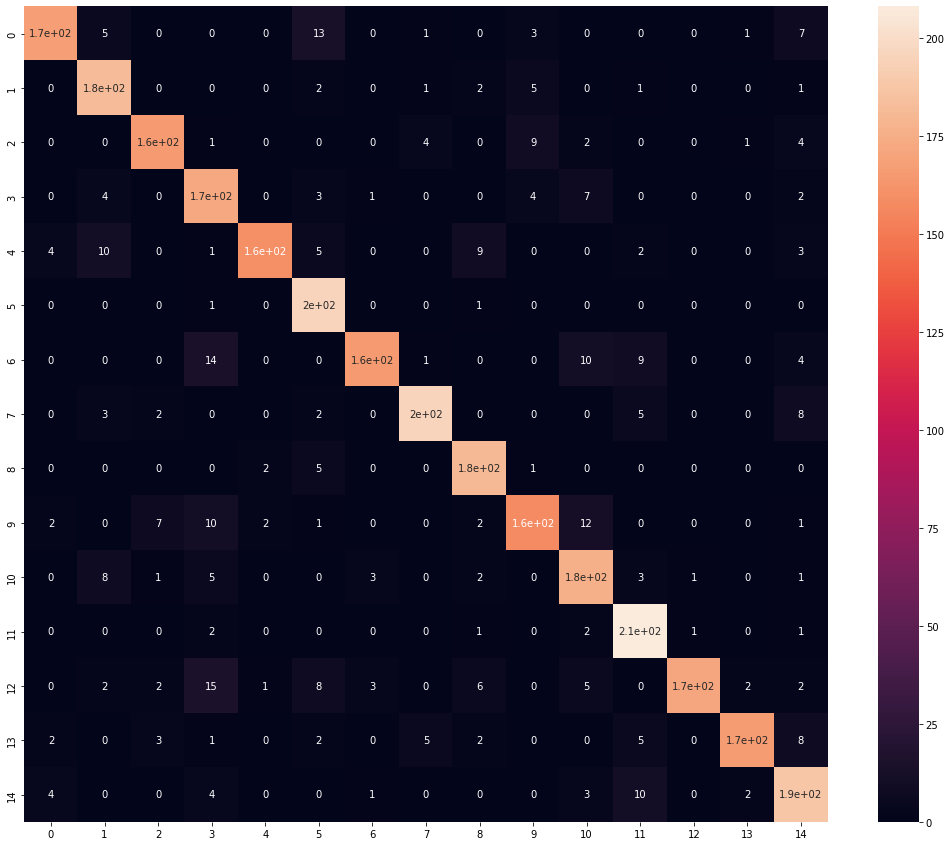

In [228]:
plt.figure(figsize=(18, 15))
sns.heatmap(np.round(cm, 1), annot=True, )
plt.show()

In [231]:
model.evaluate(x=X_val, y=y_val)

ValueError: `y` argument is not supported when using python generator as input.